<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/3%EC%A3%BC%EC%B0%A8/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction

지금까지 배운 분류 방식으로 훈련시켜보겠다. 그리고 그리드 서치로 최적화!

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 
- serum_creatinine: 혈중 크레아틴 레벨
- serum_sodium: 혈중 나트륨 레벨
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [ ]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 7.70MB/s]


In [ ]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [ ]:
df.shape

(299, 13)

299개의 데이터와 13개의 컬럼. 데이터의 양은 매우 적음. 그리고 마지막 DEATH_EVENT가 target이다. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


나이가 왜 float형식이지? 거의다 int형이고 3개만 float형이다. 


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


anaemia,diabetes,high_blood_pressure,sex,smoking이 범주형 데이터 인것을 알 수 있다. 0,1로 처리되어있기 때문. 

## EDA

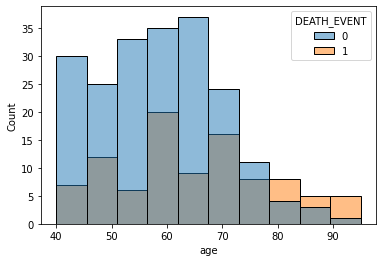

In [ ]:
sns.histplot(data=df,x='age',hue='DEATH_EVENT')

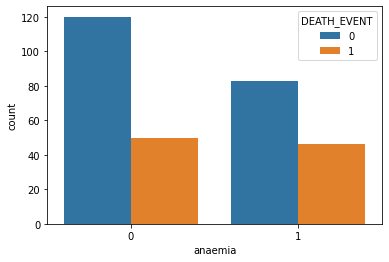

In [ ]:
sns.countplot(data=df,x='anaemia',hue='DEATH_EVENT')

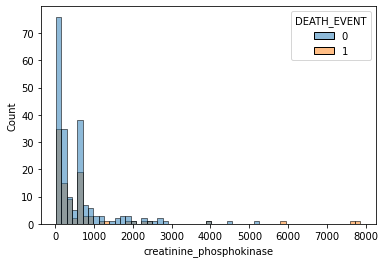

In [ ]:
sns.histplot(data=df,x='creatinine_phosphokinase',hue='DEATH_EVENT')

creatine_phosphokinase는 outlier를 고려해봐야할 듯 싶다. 

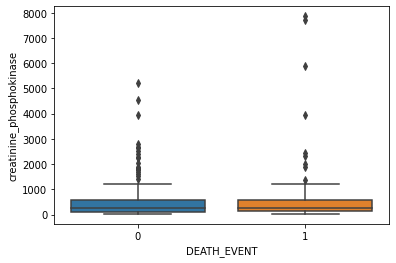

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='creatinine_phosphokinase')

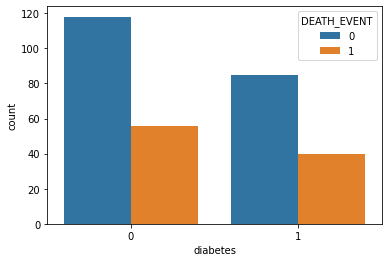

In [ ]:
sns.countplot(data=df,x='diabetes',hue='DEATH_EVENT')

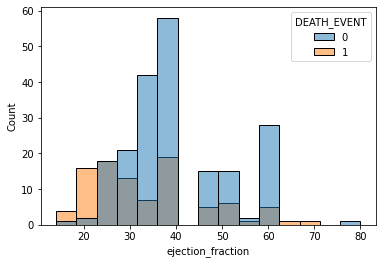

In [ ]:
sns.histplot(data=df,x='ejection_fraction',hue='DEATH_EVENT')

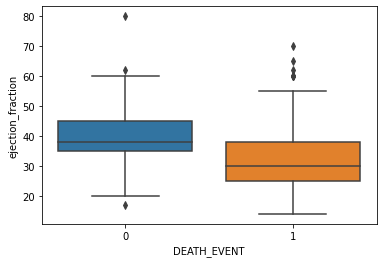

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='ejection_fraction')

죽지않은 사람이 박출계수가 더 높은 것을 볼 수 있다. 박출계수가 낮아야 심부전증에 취약한가 보다. 그리고 outlier도 뭔가 처리를 해줘야할 것 같은 느낌.

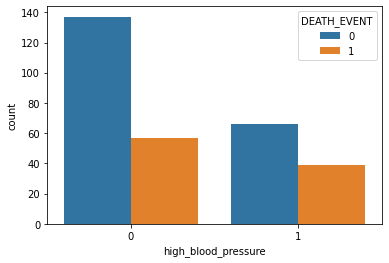

In [ ]:
sns.countplot(data=df,x='high_blood_pressure',hue='DEATH_EVENT')

고혈압이 있으면 심부전증에 더 취약한 거 같다. 

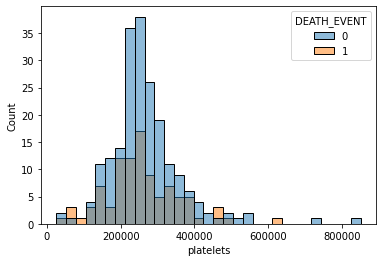

In [ ]:
sns.histplot(data=df,x='platelets',hue='DEATH_EVENT')

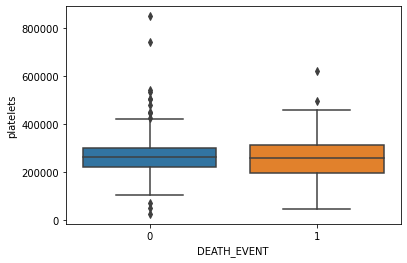

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='platelets')

사망과 혈소판의 수는 별로 상관 없어 보임

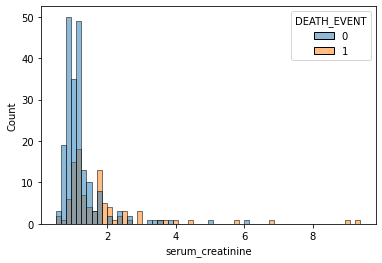

In [ ]:
sns.histplot(data=df,x='serum_creatinine',hue='DEATH_EVENT')

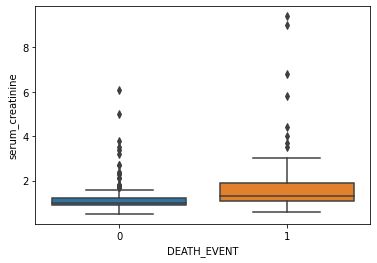

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='serum_creatinine')

죽음과 혈중 크레아틴 레벨은 관계가 있어 보인다. 혈중 크레아틴이 레벨이 높을 수록 심부전증에 취약한 듯. 

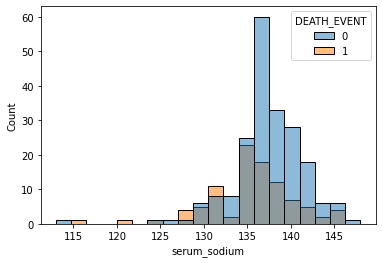

In [ ]:
sns.histplot(data=df,x='serum_sodium',hue='DEATH_EVENT')

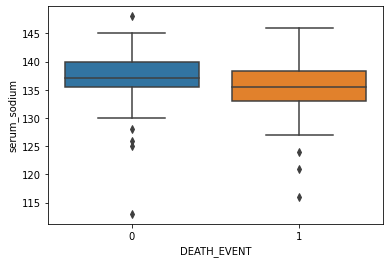

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='serum_sodium')

뭐지. 사망한 사람들의 혈중 나트륨이 평균적으로는 더 낮았다. 반비례관계인가? 혈중에 나트륨이 적을수록 좋을 것 같은데 ... 아닌가 보다

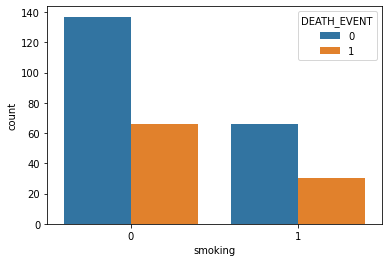

In [ ]:
sns.countplot(data=df,x='smoking',hue='DEATH_EVENT')

딱히 흡연하고는 상관있어보이진 않음

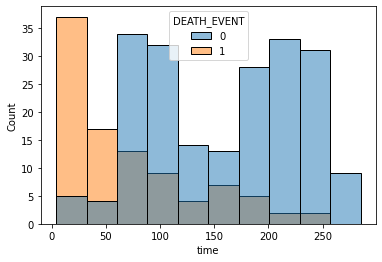

In [ ]:
sns.histplot(data=df,x='time',hue='DEATH_EVENT')

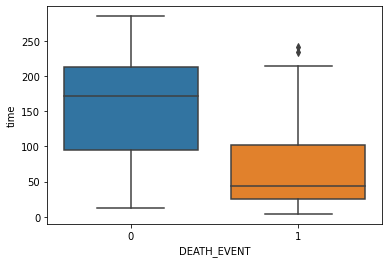

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='time')

관찰기간은 어느정도 상관이 있어보인다. 사망한 사람들의 관찰기간이 평균적으로 훨씬 짧았다. 

In [ ]:
corr=df.corr()

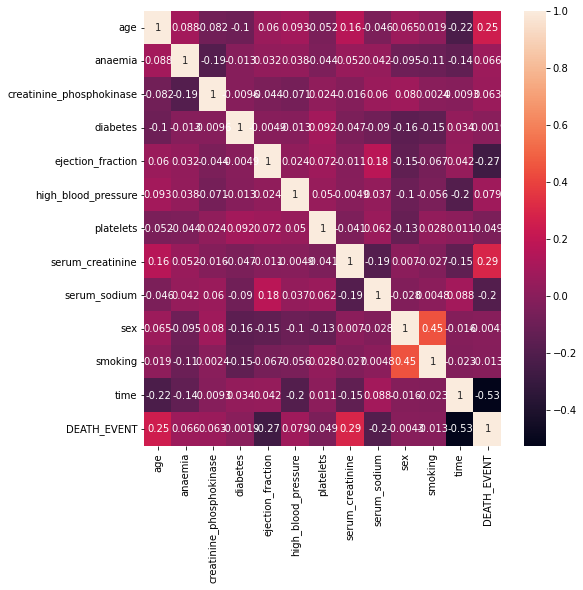

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)     

time,age,serum_sodium이 사망과 관련이 있을 것 같다. 

## 데이터 전처리

object형이 없어서 비교적 간단하게 전처리가 가능하다. 범주형 데이터만 standardScaler로 처리해주면 될 듯 싶다. 그리고 outlier는 .. 음.. 처리할지 말지 고민중이다. 왜냐면 데이터 개수가 너무 적기 때문..

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

anaemia,diabetes,high_blood_pressure,sex,smoking 가 범주형 데이터 

In [ ]:
from sklearn.preprocessing import StandardScaler

x_num=df[['age','creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium','time']]
x_cat=df[['anaemia','diabetes','high_blood_pressure','sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler =StandardScaler()
scaler.fit(x_num)
X_scaled=scaler.transform(x_num)
X_scaled=pd.DataFrame(data=X_scaled,index=x_num.index,columns=x_num.columns)
X = pd.concat([X_scaled,x_cat],axis=1)

In [ ]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,0,0,0,1,1


## 훈련, 테스트 데이터로 분리


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(209, 12)

In [ ]:
y_train.shape

(209,)

## 모델학습, 예측

- 랜덤포레스트
- XGBoost
- LightGBM

### 랜덤포레스트 모델생성,학습,예측

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
pred_proba=rf_clf.predict_proba(X_test)[:,1]
accuracy=accuracy_score(y_test,pred)
print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))
accuracy1=get_clf_eval(y_test,pred,pred_proba)

랜덤 포레스트 정확도 : 0.8444
오차행렬
[[58  4]
 [10 18]]
정확도: 0.8444, 정밀도: 0.8182, 재현율: 0.6429, F1: 0.7200, AUC:0.7892


### 랜덤포레스트 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,200],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적의 하이퍼 파라미터:",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적의 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도 :  0.8324361628709456


'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200
일때 정확도가 가장 높았다고 한다. 이제 별도의 테스트 데이터 세트에서 예측 성능을 확인해보겠다. 

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=8,
                               min_samples_split=8,random_state=0)

rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
pred_proba=rf_clf.predict_proba(X_test)[:,1]
print("정확도 :{0:.4f}".format(accuracy_score(y_test,pred)))
accuracy=get_clf_eval(y_test,pred,pred_proba)

정확도 :0.8556
오차행렬
[[59  3]
 [10 18]]
정확도: 0.8556, 정밀도: 0.8571, 재현율: 0.6429, F1: 0.7347, AUC:0.7972


튜닝을 거치니 조금 높아지긴 함. 이제 피처중요도를 확인해보겠음

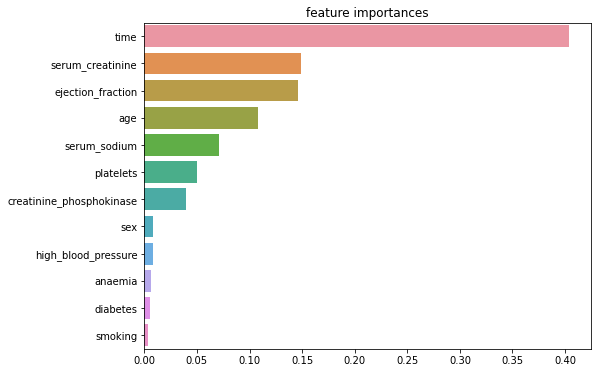

In [ ]:
ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=ftr_importances,y=ftr_importances.index)
plt.show()

시간다음으로 혈중 크레아틴 레벨이 중요함

### XGBoost로 모델 생성,학습,예측

파라미터는 n_estimators, max_depth,

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_wrapper=XGBClassifier(n_estimator=200,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds=xgb_wrapper.predict(X_test)
w_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test,w_preds,w_preds_proba)

오차행렬
[[57  5]
 [ 7 21]]
정확도: 0.8667, 정밀도: 0.8077, 재현율: 0.7500, F1: 0.7778, AUC:0.8347


정확도는 랜덤포레스트를 썼을 때보다는 조금 높다. 

조기 중단 관련 파라미터는 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds. 조기 중단을 위한 평가 지표인 eval_early_stopping_rounds를 100, eval_metric은 logloss, eval_set은 테스트 데이터 세트를 설정하겠다

In [ ]:
xgb_wrapper=XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=4)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                eval_set=evals,verbose=True)
ws100_preds=xgb_wrapper.predict(X_test)
ws100_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.63929
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.597618
[2]	validation_0-logloss:0.564216
[3]	validation_0-logloss:0.531835
[4]	validation_0-logloss:0.504653
[5]	validation_0-logloss:0.481295
[6]	validation_0-logloss:0.461353
[7]	validation_0-logloss:0.447224
[8]	validation_0-logloss:0.435084
[9]	validation_0-logloss:0.423107
[10]	validation_0-logloss:0.408694
[11]	validation_0-logloss:0.398279
[12]	validation_0-logloss:0.390939
[13]	validation_0-logloss:0.385225
[14]	validation_0-logloss:0.378361
[15]	validation_0-logloss:0.372502
[16]	validation_0-logloss:0.369629
[17]	validation_0-logloss:0.366762
[18]	validation_0-logloss:0.364669
[19]	validation_0-logloss:0.363354
[20]	validation_0-logloss:0.361519
[21]	validation_0-logloss:0.361369
[22]	validation_0-logloss:0.356759
[23]	validation_0-logloss:0.354848
[24]	validation_0-logloss:0.353129
[25]	validation_0-logloss:0.349926
[26]	validation_0-logloss:0.3487

In [ ]:
get_clf_eval(y_test,ws100_preds,ws100_preds_proba)

오차행렬
[[56  6]
 [ 7 21]]
정확도: 0.8556, 정밀도: 0.7778, 재현율: 0.7500, F1: 0.7636, AUC:0.8266


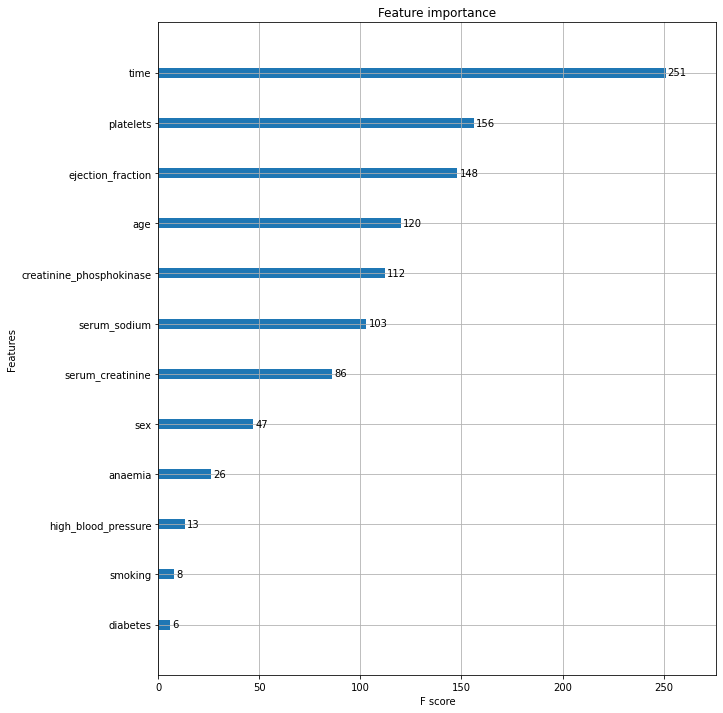

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper,ax=ax)

### XGBoost 하이퍼 파라미터 튜닝

max_depth,min_child_weight,colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 하겠다.


In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[3,5,7],
    'min_child_weight':[1,3,5],
    'sub_sample':[6,8]
}

xgb_clf=XGBClassifier(n_estimators=100,random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(xgb_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적의 하이퍼 파라미터:",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적의 하이퍼 파라미터: {'max_depth': 5, 'min_child_weight': 3, 'sub_sample': 6}
최고 예측 정확도 :  0.8421670117322292


In [ ]:
xgb_clf1=XGBClassifier(n_estimators=100,max_depth=5,min_child_weight=3,sub_sample=6,random_state=0)
xgb_clf1.fit(X_train,y_train)
pred=xgb_clf1.predict(X_test)
pred_proba=xgb_clf1.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[57  5]
 [ 6 22]]
정확도: 0.8778, 정밀도: 0.8148, 재현율: 0.7857, F1: 0.8000, AUC:0.8525


In [ ]:
xgb_clf=XGBClassifier(n_estimators=100)

params={
    'max_depth':[3,5,7],
    'min_child_weight':[1,3,5],
    'sub_sample':[6,8]
}

gridcv=GridSearchCV(xgb_clf,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",
           eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score=roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[46]	validation_0-auc:0.956352	validation_1-auc:0.90841
[47]	validation_0-auc:0.956769	validation_1-auc:0.90841
[48]	validation_0-auc:0.957603	validation_1-auc:0.912442
[49]	validation_0-auc:0.958333	validation_1-auc:0.913018
[50]	validation_0-auc:0.958333	validation_1-auc:0.913594
[51]	validation_0-auc:0.958542	validation_1-auc:0.911866
[52]	validation_0-auc:0.959011	validation_1-auc:0.915323
[53]	validation_0-auc:0.959116	validation_1-auc:0.915323
[54]	validation_0-auc:0.95922	validation_1-auc:0.915323
[55]	validation_0-auc:0.958803	validation_1-auc:0.915899
[56]	validation_0-auc:0.959116	validation_1-auc:0.916475
[57]	validation_0-auc:0.960784	validation_1-auc:0.918779
[58]	validation_0-auc:0.960054	validation_1-auc:0.918203
[59]	validation_0-auc:0.960159	validation_1-auc:0.917627
[60]	validation_0-auc:0.960784	validation_1-auc:0.919355
[61]	validation_0-auc:0.960784	validation_1-auc:0.918203
[62]	validation_0-auc:0.960889	validation_1-auc:0.91993

In [ ]:
xgb_wrapper1=XGBClassifier(n_estimator=200,learning_rate=0.1,max_depth=3,
                           min_child_weight=5,sub_sample=6,random_state=0)
evals=[(X_test,y_test)]
xgb_wrapper1.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
w_preds1=xgb_wrapper1.predict(X_test)
w_preds_proba1=xgb_wrapper1.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.639987
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.59975
[2]	validation_0-logloss:0.561806
[3]	validation_0-logloss:0.532077
[4]	validation_0-logloss:0.504058
[5]	validation_0-logloss:0.479955
[6]	validation_0-logloss:0.460362
[7]	validation_0-logloss:0.442236
[8]	validation_0-logloss:0.427199
[9]	validation_0-logloss:0.412471
[10]	validation_0-logloss:0.401815
[11]	validation_0-logloss:0.390191
[12]	validation_0-logloss:0.384212
[13]	validation_0-logloss:0.372308
[14]	validation_0-logloss:0.368158
[15]	validation_0-logloss:0.363958
[16]	validation_0-logloss:0.356707
[17]	validation_0-logloss:0.352444
[18]	validation_0-logloss:0.344811
[19]	validation_0-logloss:0.342683
[20]	validation_0-logloss:0.341849
[21]	validation_0-logloss:0.33572
[22]	validation_0-logloss:0.33379
[23]	validation_0-logloss:0.331868
[24]	validation_0-logloss:0.328021
[25]	validation_0-logloss:0.328937
[26]	validation_0-logloss:0.32656


In [ ]:
get_clf_eval(y_test,w_preds1,w_preds_proba1)

오차행렬
[[60  2]
 [ 9 19]]
정확도: 0.8778, 정밀도: 0.9048, 재현율: 0.6786, F1: 0.7755, AUC:0.8232


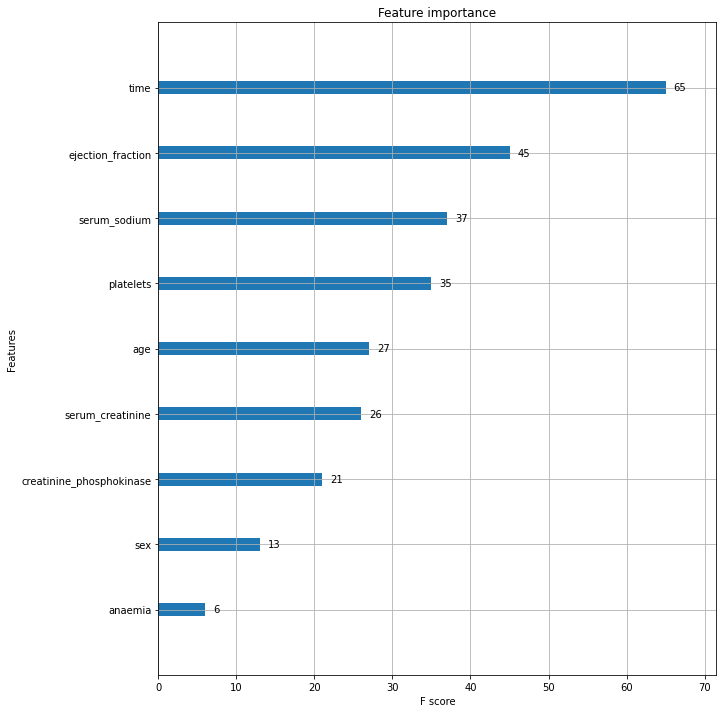

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper1,ax=ax)

0.8778이 최대임.. ㅠㅜ

### LightGBM 모델 생성. 학습, 예측

In [ ]:
lgbm_clf=LGBMClassifier()
lgbm_clf.fit(X_train,y_train)
pred=lgbm_clf.predict(X_test)
pred_proba=lgbm_clf.predict_proba(X_test)[:,1]
accuracy_lgbm=get_clf_eval(y_test,pred,pred_proba)
accuracy_lgbm

오차행렬
[[60  2]
 [10 18]]
정확도: 0.8667, 정밀도: 0.9000, 재현율: 0.6429, F1: 0.7500, AUC:0.8053


In [ ]:
lgbm_wrapper=LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(X_test)
preds_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.577127	valid_0's binary_logloss: 0.577127
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.541464	valid_0's binary_logloss: 0.541464
[3]	valid_0's binary_logloss: 0.512684	valid_0's binary_logloss: 0.512684
[4]	valid_0's binary_logloss: 0.487542	valid_0's binary_logloss: 0.487542
[5]	valid_0's binary_logloss: 0.467198	valid_0's binary_logloss: 0.467198
[6]	valid_0's binary_logloss: 0.449839	valid_0's binary_logloss: 0.449839
[7]	valid_0's binary_logloss: 0.433242	valid_0's binary_logloss: 0.433242
[8]	valid_0's binary_logloss: 0.420254	valid_0's binary_logloss: 0.420254
[9]	valid_0's binary_logloss: 0.40876	valid_0's binary_logloss: 0.40876
[10]	valid_0's binary_logloss: 0.401366	valid_0's binary_logloss: 0.401366
[11]	valid_0's binary_logloss: 0.390989	valid_0's binary_logloss: 0.390989
[12]	valid_0's binary_logloss: 0.385955	valid_0's binary_logloss: 0.385955
[13]	valid_0's binary_logloss: 0.374619	valid_0'

In [ ]:
get_clf_eval(y_test,preds,preds_proba)

오차행렬
[[60  2]
 [ 9 19]]
정확도: 0.8778, 정밀도: 0.9048, 재현율: 0.6786, F1: 0.7755, AUC:0.8232


In [ ]:
lgbm_wrapper=LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)

lgbm_roc_score=roc_auc_score(y_test,lgbm_wrapper.predict_proba(X_test)[:,1],average='macro')
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.577127	valid_0's binary_logloss: 0.577127
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.541464	valid_0's binary_logloss: 0.541464
[3]	valid_0's binary_logloss: 0.512684	valid_0's binary_logloss: 0.512684
[4]	valid_0's binary_logloss: 0.487542	valid_0's binary_logloss: 0.487542
[5]	valid_0's binary_logloss: 0.467198	valid_0's binary_logloss: 0.467198
[6]	valid_0's binary_logloss: 0.449839	valid_0's binary_logloss: 0.449839
[7]	valid_0's binary_logloss: 0.433242	valid_0's binary_logloss: 0.433242
[8]	valid_0's binary_logloss: 0.420254	valid_0's binary_logloss: 0.420254
[9]	valid_0's binary_logloss: 0.40876	valid_0's binary_logloss: 0.40876
[10]	valid_0's binary_logloss: 0.401366	valid_0's binary_logloss: 0.401366
[11]	valid_0's binary_logloss: 0.390989	valid_0's binary_logloss: 0.390989
[12]	valid_0's binary_logloss: 0.385955	valid_0's binary_logloss: 0.385955
[13]	valid_0's binary_logloss: 0.374619	valid_0'

### LGBM 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[128,160],
    'num_leaves':[32,64],
    'min_chlid_samples':[60,100],
    'sumbsample':[0.8,1]
}

lgbm_clf=LGBMClassifier(n_estimators=200,random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(lgbm_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적의 하이퍼 파라미터:",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적의 하이퍼 파라미터: {'max_depth': 128, 'min_chlid_samples': 60, 'num_leaves': 32, 'sumbsample': 0.8}
최고 예측 정확도 :  0.8037267080745342


In [ ]:
lgbm_clf1=LGBMClassifier(n_estimators=100,max_depth=128,min_child_samples=60,subsample=0.8,num_leaves=32,random_state=0)
lgbm_clf1.fit(X_train,y_train)
pred=lgbm_clf1.predict(X_test)
pred_proba=lgbm_clf1.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[60  2]
 [10 18]]
정확도: 0.8667, 정밀도: 0.9000, 재현율: 0.6429, F1: 0.7500, AUC:0.8053


In [ ]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf=LGBMClassifier(n_estimators=400)

params={
    'max_depth':[128,160],
    'num_leaves':[32,64],
    'min_chlid_samples':[60,100],
    'sumbsample':[0.8,1]
}

#cv는 3으로 지정
gridcv=GridSearchCV(lgbm_clf,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",
           eval_set=[(X_train,y_train),(X_test,y_test)])

print('gridsearchcv 최적 파라미터:',gridcv.best_params_)
lgbm_roc_score=roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC :{0:4f}'.format(lgbm_roc_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[45]	valid_0's binary_logloss: 0.249146	valid_0's auc: 0.962453	valid_1's binary_logloss: 0.360929	valid_1's auc: 0.902074
[46]	valid_0's binary_logloss: 0.247602	valid_0's auc: 0.962244	valid_1's binary_logloss: 0.362539	valid_1's auc: 0.900346
[47]	valid_0's binary_logloss: 0.247103	valid_0's auc: 0.961514	valid_1's binary_logloss: 0.361793	valid_1's auc: 0.900922
[48]	valid_0's binary_logloss: 0.244727	valid_0's auc: 0.962349	valid_1's binary_logloss: 0.363729	valid_1's auc: 0.898618
[49]	valid_0's binary_logloss: 0.243638	valid_0's auc: 0.962557	valid_1's binary_logloss: 0.361425	valid_1's auc: 0.900922
[50]	valid_0's binary_logloss: 0.242803	valid_0's auc: 0.962766	valid_1's binary_logloss: 0.361826	valid_1's auc: 0.89977
[51]	valid_0's binary_logloss: 0.240795	valid_0's auc: 0.963287	valid_1's binary_logloss: 0.363927	valid_1's auc: 0.898618
[52]	valid_0's binary_logloss: 0.238065	valid_0's auc: 0.963496	valid_1's binary_logloss: 0.361962	valid

In [ ]:
최적 파라미터: {'max_depth': 128, 'min_chlid_samples': 60, 'num_leaves': 32, 'sumbsample': 0.8}
ROC AUC :0.936636

In [ ]:
lgbm_wrapper1=LGBMClassifier(n_estimator=400,max_depth=128,min_child_samples=60,
                           num_leaves=32,subsample=0.8,random_state=0)
evals=[(X_test,y_test)]
lgbm_wrapper1.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
w_preds1=lgbm_wrapper1.predict(X_test)
w_preds_proba1=lgbm_wrapper1.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.585624	valid_0's binary_logloss: 0.585624
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.557764	valid_0's binary_logloss: 0.557764
[3]	valid_0's binary_logloss: 0.534999	valid_0's binary_logloss: 0.534999
[4]	valid_0's binary_logloss: 0.51661	valid_0's binary_logloss: 0.51661
[5]	valid_0's binary_logloss: 0.500636	valid_0's binary_logloss: 0.500636
[6]	valid_0's binary_logloss: 0.487958	valid_0's binary_logloss: 0.487958
[7]	valid_0's binary_logloss: 0.476292	valid_0's binary_logloss: 0.476292
[8]	valid_0's binary_logloss: 0.465735	valid_0's binary_logloss: 0.465735
[9]	valid_0's binary_logloss: 0.457488	valid_0's binary_logloss: 0.457488
[10]	valid_0's binary_logloss: 0.449138	valid_0's binary_logloss: 0.449138
[11]	valid_0's binary_logloss: 0.440758	valid_0's binary_logloss: 0.440758
[12]	valid_0's binary_logloss: 0.438721	valid_0's binary_logloss: 0.438721
[13]	valid_0's binary_logloss: 0.431335	valid_0'

In [ ]:
get_clf_eval(y_test,w_preds1,w_preds_proba1)

오차행렬
[[60  2]
 [10 18]]
정확도: 0.8667, 정밀도: 0.9000, 재현율: 0.6429, F1: 0.7500, AUC:0.8053


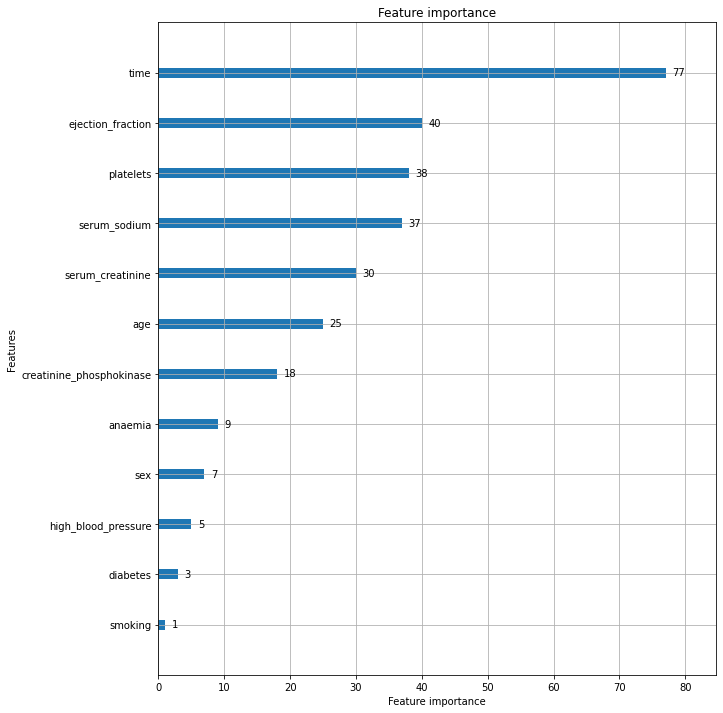

In [ ]:
#plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

0.8667이 최대

##  ROC 커브 확인하기

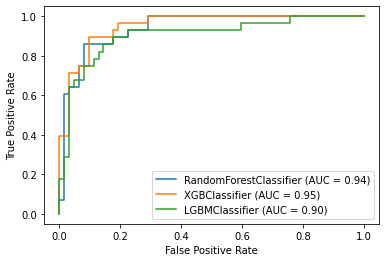

In [ ]:
from sklearn.metrics import plot_roc_curve

fig=plt.figure()
ax=fig.gca()
plot_roc_curve(rf_clf1,X_test,y_test,ax=ax)
plot_roc_curve(xgb_wrapper1,X_test,y_test,ax=ax)
plot_roc_curve(lgbm_wrapper1,X_test,y_test,ax=ax)